In [1]:
"""
Loaded data from extended ion tests
"""

'\nLoaded data from extended ion tests\n'

#  FF logistics

FF requires <- pairs_data, data_frame, structures

pickle and do all jax on bach

In [2]:
# python ff_energy/ffe/cli.py -d -m dcm -t pbe0dz -e pc -v -msp /home/boittier/pcbach

In [3]:
#python ff_energy/ffe/cli.py -d -m ions_ext -t pbe0dz -e pc -v -msp /home/boittier/pcbach

In [1]:
# %load_ext autoreload
# %autoreload 2

from pathlib import Path
import seaborn as sns
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

from ff_energy.latex_writer.report import Report
from ff_energy.latex_writer.energydata.energy_data_report import EnergyReport
from ff_energy.latex_writer.figure import Figure
from ff_energy.latex_writer.format import safe_latex_string
from ff_energy.utils.ffe_utils import read_from_pickle, pickle_output

from ff_energy.ffe.ff import FF
from ff_energy.ffe.constants import PKL_PATH, PDB_PATH
from ff_energy.ffe.potential import LJ, LJ_bound, DE #, DE_bounds

from ff_energy.ffe.data import pairs_data
from ff_energy.plotting.data_plots import DataPlots
from ff_energy.plotting.fit_results import residuals_from_keys

from ff_energy.latex_writer.extra_data import water_pol_, dcm_pol_, dcm_elec_




water_pol_ = dcm_pol_

2023-09-13 11:07:32 | DEBUG | __init__:process_initializer_module:72 - Initializing MLIR with module: _site_initialize_0
2023-09-13 11:07:32 | DEBUG | __init__:process_initializer_module:74 - Registering dialects from initializer <module 'jaxlib.mlir._mlir_libs._site_initialize_0' from '/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/jaxlib/mlir/_mlir_libs/_site_initialize_0.so'>
2023-09-13 11:07:32 | DEBUG | path:<module>:29 - etils.epath found. Using etils.epath for file I/O.


<Figure size 100x100 with 0 Axes>

In [2]:
pkl_path = "/home/boittier/Documents/phd/ff_energy/pickles/energy_report.pkl"
er = pd.read_pickle(pkl_path)

In [3]:
water_pol_.describe()

,ELEC
count,200.000000
mean,-1.385638
std,0.442705
min,-2.690399
25%,-1.674524
50%,-1.327307
75%,-1.036644
max,-0.444418


In [4]:
water_pol_

,ELEC
100_4322_DCM_499_988,-1.369992
100_646_DCM_76_1117,-0.741479
100_1774_DCM_207_229,-0.978223
100_2990_DCM_349_1039,-1.527585
100_392_DCM_46_962,-0.884893
...,...
100_1849_DCM_216_299,-1.344862
100_78_DCM_9_1170,-1.288394
100_410_DCM_48_226,-1.435553
100_1237_DCM_145_421,-1.169886


In [5]:
# (water_pol_.T + water_ecol).T
(dcm_pol_ + dcm_elec_).sort_index()

,ELEC
100_1018_DCM_120_967,-21.599542
100_1019_DCM_120_565,-30.129872
100_1024_DCM_121_932,-17.508540
100_1053_DCM_123_948,-36.197482
100_1100_DCM_129_15,-40.843937
...,...
100_979_DCM_115_117,-15.793819
100_983_DCM_116_25,-46.111346
100_986_DCM_116_989,-25.979675
100_98_DCM_12_534,-40.165244


In [6]:
dcm_pol_.describe()

,ELEC
count,200.000000
mean,-1.385638
std,0.442705
min,-2.690399
25%,-1.674524
50%,-1.327307
75%,-1.036644
max,-0.444418


In [7]:
dcm_elec_.sort_index()

,ELEC
100_1018_DCM_120_967,-20.567562
100_1019_DCM_120_565,-28.837646
100_1024_DCM_121_932,-16.497216
100_1053_DCM_123_948,-34.970801
100_1100_DCM_129_15,-38.877332
...,...
100_979_DCM_115_117,-15.129841
100_983_DCM_116_25,-44.367339
100_986_DCM_116_989,-24.987267
100_98_DCM_12_534,-38.295094


In [9]:
dcm_elec_.describe()

,ELEC
count,200.000000
mean,-29.052953
std,9.056492
min,-53.016432
25%,-35.542176
50%,-29.286523
75%,-21.528620
max,-11.819770


#  DCM elec data

In [10]:
#  ecol
water_ecol = dcm_elec_["ELEC"]
water_ecol = water_ecol.rename("ELEC") #  rename every electrostatics ELEC
#  pc
water_pc = er.data[1].data["ELEC"]
#  mdcm
_ = next(read_from_pickle("/home/boittier/Documents/phd/ff_energy/pickles/dcm_pbe0dz_mdcm.pkl"))
water_mdcm = _.data["ELEC"]
#  kmdcm
# _ = next(read_from_pickle("/home/boittier/Documents/phd/ff_energy/pickles/dcm_pbe0dz_kmdcm.pkl"))
# water_kmdcm = _.data["ELEC"]

In [11]:
er.data[1].data.sort_index().keys()

Index(['TOTAL', 'ELEC', 'VDW', 'KEY', 'M_ENERGY', 'KEY', 'n_monomers',
       'C_ENERGY', 'intE', 'P_intE', 'C_ENERGY_kcalmol', 'ELEC_CI',
       'ELEC_POL'],
      dtype='object')

In [12]:
k1 = "ELECci"
k2s = ["ELECpol", "ELECp", "ELECm"]

#  Add data to the model

In [13]:
# water
# polarization
er.add_data(1, dcm_pol_ + dcm_elec_, "pol")
# coulomb
er.add_data(1, water_ecol, "ci")
# pc
er.add_data(1, water_pc, "p")
# mdcm
er.add_data(1, water_mdcm, "m")
# kmdcm
# er.add_data(0, water_kmdcm, "k")
# null
er.add_data(1, water_pol_*0, "null")


DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:26 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:27 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:27 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:27 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:27 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:to

saving  res_ELECci_ELECpol_dcm


DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:29 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:title position was updated manually, not adjusting
2023-09-11 14:36:29 | DEBUG | _base:_update_title_position:2966 - title position was updated manually, not adjusting
DEBUG:matplotlib.axes._base:title position was updated manually, not adjusting
2023-09-11 14:36:29 | DEBUG | _base:_update_title_position:2966 - title position was updated manually, not adjusting
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:29 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:29 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._bas

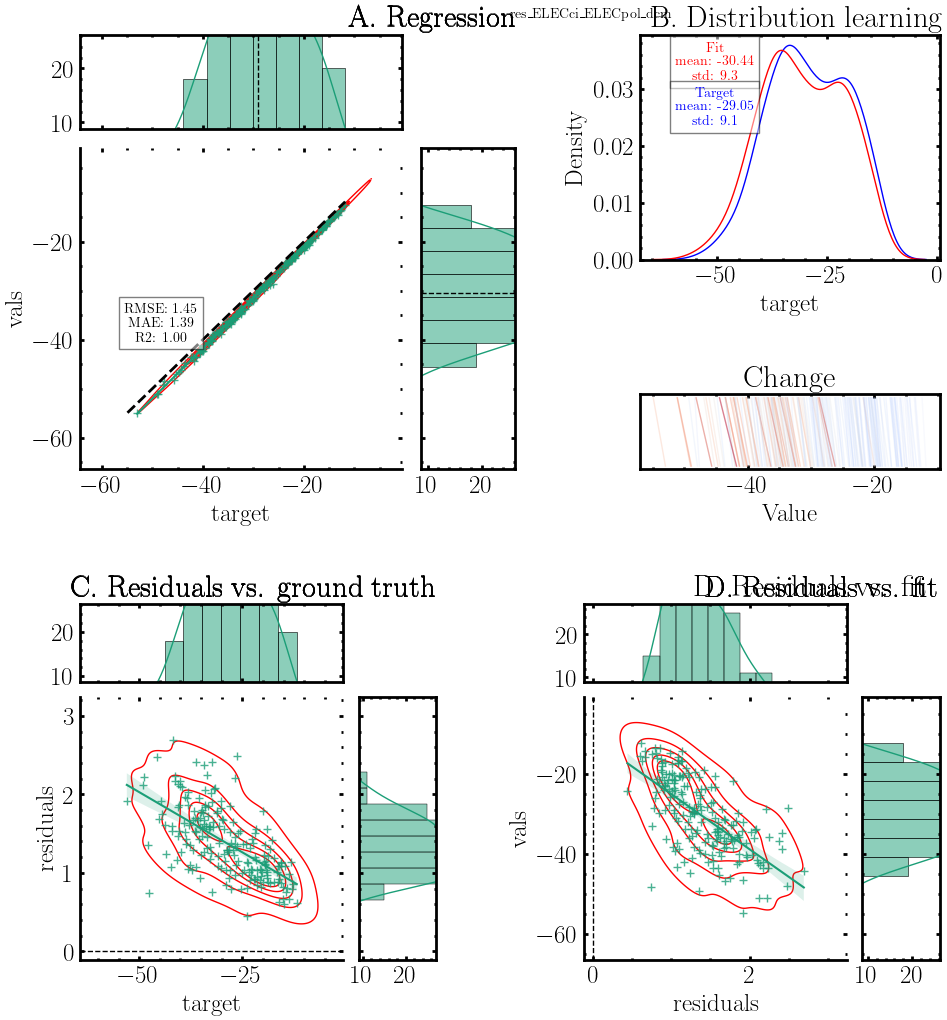

DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:33 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:33 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:33 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:33 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:33 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:to

saving  res_ELECci_ELECp_dcm


DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:36 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:title position was updated manually, not adjusting
2023-09-11 14:36:36 | DEBUG | _base:_update_title_position:2966 - title position was updated manually, not adjusting
DEBUG:matplotlib.axes._base:title position was updated manually, not adjusting
2023-09-11 14:36:36 | DEBUG | _base:_update_title_position:2966 - title position was updated manually, not adjusting
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:36 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:36 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._bas

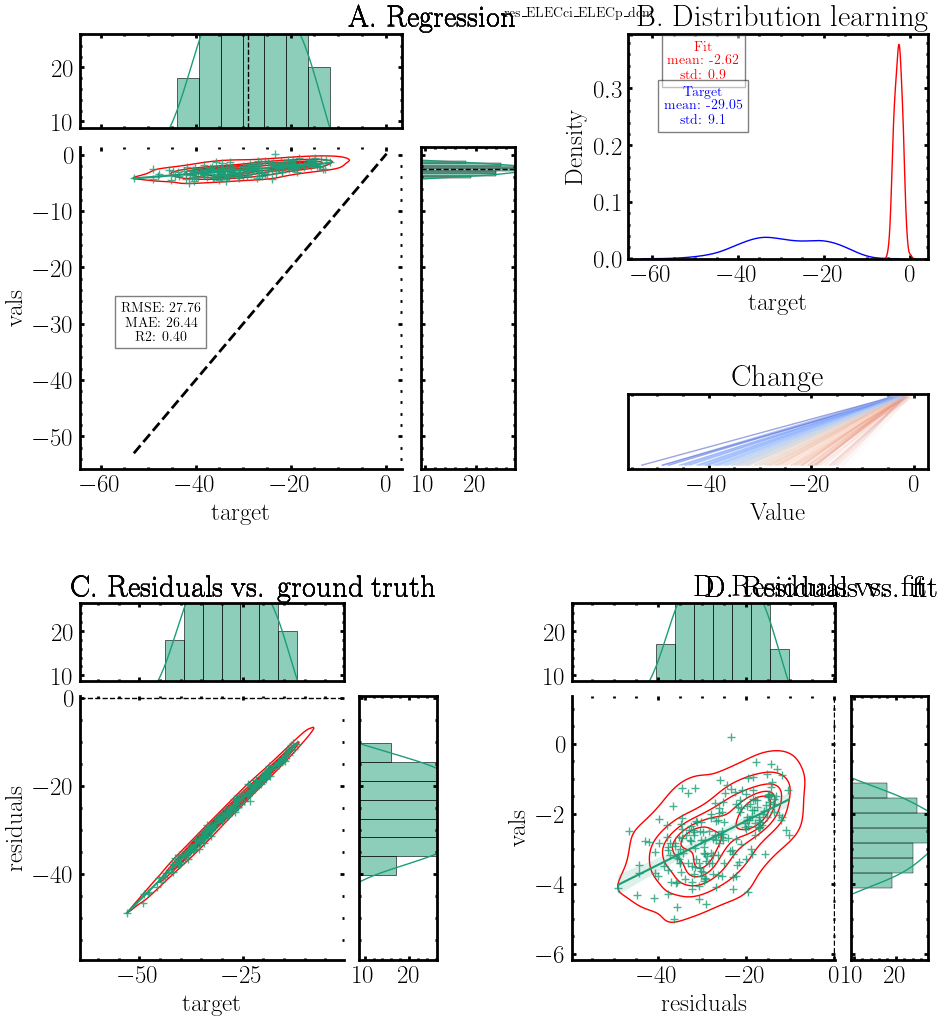

DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:40 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:40 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:40 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:40 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:40 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:to

saving  res_ELECci_ELECm_dcm


DEBUG:matplotlib.axes._base:title position was updated manually, not adjusting
2023-09-11 14:36:43 | DEBUG | _base:_update_title_position:2966 - title position was updated manually, not adjusting
DEBUG:matplotlib.axes._base:title position was updated manually, not adjusting
2023-09-11 14:36:43 | DEBUG | _base:_update_title_position:2966 - title position was updated manually, not adjusting
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:43 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:43 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-09-11 14:36:43 | DEBUG | _base:_update_title_position:3003 - top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._bas

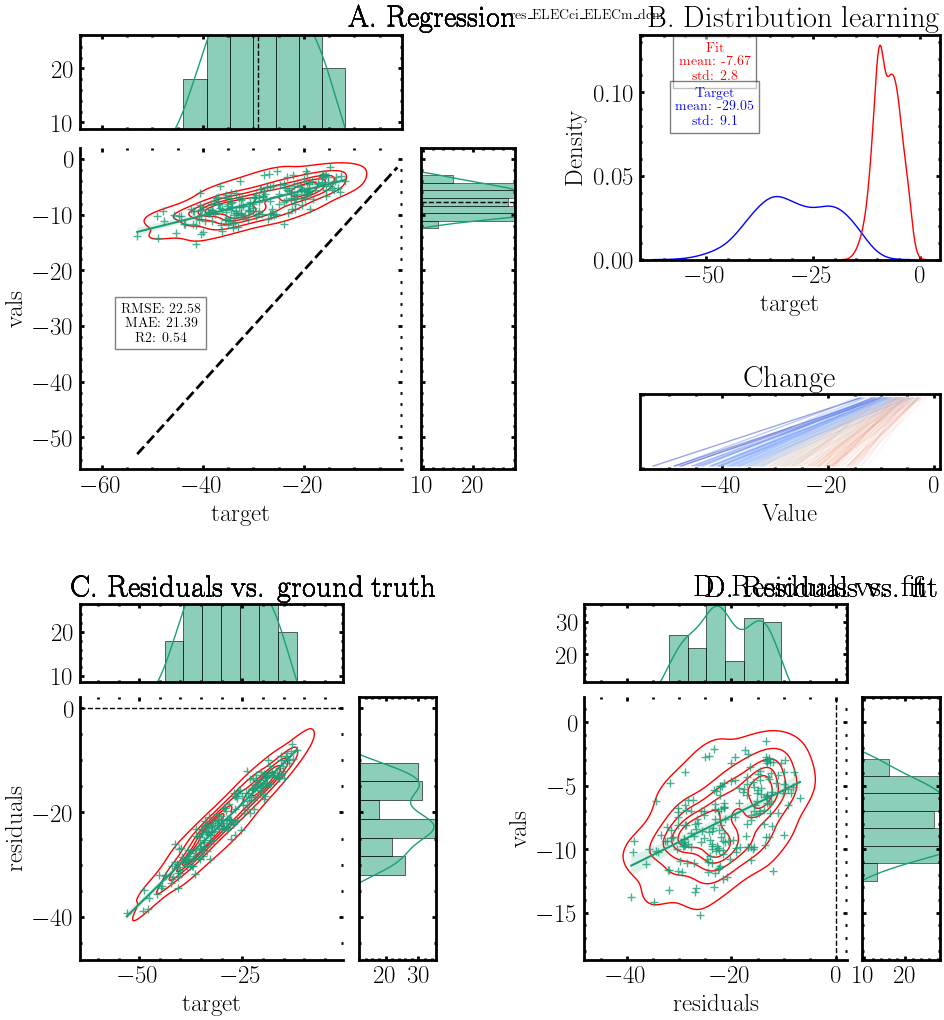

<Figure size 800x600 with 0 Axes>

In [25]:
for k in k2s:
    residuals_from_keys(er.data[1].data, k1, k, label=f"res_{k1}_{k}_dcm")
    plt.show()
    plt.clf()

In [51]:
?EnergyReport.add_data

Signature: EnergyReport.add_data(self, index, data, key) -> None
Docstring:
adds a column to the data
:param index: the index of the data to add to
:param data: the data to add
:param key: the key to add the data under
:return: None
File:      ~/Documents/phd/ff_energy/ff_energy/latex_writer/energydata/energy_data_report.py
Type:      function

In [14]:
er.data_plots[1].obj.data.sort_index()

,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,intE,P_intE,C_ENERGY_kcalmol,ELEC_CI,ELEC_POL,ELECpol,ELECci,ELECp,ELECm,ELECnull
100_1018_DCM_120_967,8.04068,-1.88784,-30.40458,100_1018_DCM_120_967,-19187.367411,100_1018_DCM_120_967,20,-19187.387191,-12.411790,-12.532116,-1.204014e+07,-20.567562,-1.421479,-21.599542,-20.567562,-1.88784,-5.55673,-0.0
100_1019_DCM_120_565,9.89488,-2.62215,-35.67010,100_1019_DCM_120_565,-19187.356685,100_1019_DCM_120_565,20,-19187.379774,-14.488511,-15.246951,-1.204014e+07,-28.837646,-2.050995,-30.129872,-28.837646,-2.62215,-7.65099,-0.0
100_1024_DCM_121_932,10.32904,-1.47130,-31.15835,100_1024_DCM_121_932,-19187.342979,100_1024_DCM_121_932,20,-19187.365864,-14.360149,-13.865660,-1.204013e+07,-16.497216,-1.404197,-17.508540,-16.497216,-1.47130,-4.03920,-0.0
100_1053_DCM_123_948,9.79551,-3.52281,-35.38260,100_1053_DCM_123_948,-19187.359041,100_1053_DCM_123_948,20,-19187.376685,-11.071544,-11.036796,-1.204014e+07,-34.970801,-1.757483,-36.197482,-34.970801,-3.52281,-8.05686,-0.0
100_1100_DCM_129_15,9.00233,-2.83638,-33.26086,100_1100_DCM_129_15,-19187.360730,100_1100_DCM_129_15,20,-19187.381994,-13.342866,-13.423951,-1.204014e+07,-38.877332,-2.678006,-40.843937,-38.877332,-2.83638,-9.75593,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100_979_DCM_115_117,10.52301,-1.09235,-29.25850,100_979_DCM_115_117,-19187.343536,100_979_DCM_115_117,20,-19187.363317,-12.412769,-12.238591,-1.204013e+07,-15.129841,-1.104415,-15.793819,-15.129841,-1.09235,-3.17565,-0.0
100_983_DCM_116_25,9.49413,-3.69630,-36.41305,100_983_DCM_116_25,-19187.339973,100_983_DCM_116_25,20,-19187.356356,-10.280112,-11.185809,-1.204012e+07,-44.367339,-2.568431,-46.111346,-44.367339,-3.69630,-10.24308,-0.0
100_986_DCM_116_989,10.93140,-3.39350,-30.97783,100_986_DCM_116_989,-19187.330647,100_986_DCM_116_989,20,-19187.349940,-12.106152,-12.100108,-1.204012e+07,-24.987267,-1.390889,-25.979675,-24.987267,-3.39350,-8.05472,-0.0
100_98_DCM_12_534,10.41278,-1.78878,-35.84975,100_98_DCM_12_534,-19187.337523,100_98_DCM_12_534,20,-19187.363902,-16.552713,-17.572315,-1.204013e+07,-38.295094,-2.656555,-40.165244,-38.295094,-1.78878,-9.19456,-0.0


In [73]:
er.data_plots[0].obj.data.keys()

Index(['ECOL', 'KEY', 'TOTAL', 'ELEC', 'VDW', 'KEY', 'M_ENERGY', 'KEY',
       'n_monomers', 'C_ENERGY', 'n_pairs', 'intE', 'P_intE', 'm_E_tot',
       'p_m_E_tot', 'C_ENERGY_kcalmol', 'ELECpol', 'ELECci', 'ELECp', 'ELECm',
       'ELECk', 'ELECnull'],
      dtype='object')

In [15]:
pickle_output(er.data_plots[1].obj.data, "20230904_dcm.pkl")

In [76]:
pd.read_pickle(PKL_PATH / "20230823_water_clusters.pkl.pkl")

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,...,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol,ELECpol,ELECci,ELECp,ELECm,ELECk,ELECnull
test0,-173.022645,test0,24.14023,-86.50353,20.41138,test0,-1527.133263,test0,20,-1527.276175,...,-77.478222,958362.266640,-958281.958385,-958370.381547,-189.398308,-173.022645,-86.50353,-109.15129,-104.54998,-0.0
test1,-105.096240,test1,25.25058,-55.44306,8.97296,test1,-1527.135387,test1,20,-1527.221635,...,-53.285800,958360.933743,-958282.584949,-958336.157791,-112.670681,-105.096240,-55.44306,-67.34370,-63.45565,-0.0
test10,-108.320600,test10,22.55630,-52.42873,8.46527,test10,-1527.152885,test10,20,-1527.237300,...,-53.686359,958349.953526,-958293.673338,-958345.987230,-116.637716,-108.320600,-52.42873,-62.11265,-62.96512,-0.0
test100,-120.244324,test100,23.76369,-66.03681,19.45476,test100,-1527.141372,test100,20,-1527.210157,...,-42.125801,958357.178250,-958287.528329,-958328.955198,-128.580385,-120.244324,-66.03681,-72.15766,-66.67887,-0.0
test101,-125.221598,test101,19.42966,-67.62729,15.89952,test101,-1527.160675,test101,20,-1527.249770,...,-56.202439,958345.065616,-958299.378782,-958353.812267,-133.491754,-125.221598,-67.62729,-77.04152,-74.99933,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test95,-123.917572,test95,24.31345,-71.02166,12.12799,test95,-1527.135077,test95,20,-1527.246088,...,-64.474238,958361.127974,-958282.315261,-958351.502253,-135.578897,-123.917572,-71.02166,-83.76700,-76.31560,-0.0
test96,-163.434955,test96,25.18816,-78.76038,18.10955,test96,-1527.131558,test96,20,-1527.246828,...,-71.755372,958363.336270,-958280.211262,-958351.966386,-178.037113,-163.434955,-78.76038,-97.21214,-93.72871,-0.0
test97,-132.990408,test97,22.23548,-71.50784,10.84849,test97,-1527.149964,test97,20,-1527.258582,...,-66.680359,958351.786719,-958292.562174,-958359.342081,-145.172647,-132.990408,-71.50784,-82.54423,-79.19230,-0.0
test98,-114.076388,test98,19.89380,-59.12743,9.63436,test98,-1527.160158,test98,20,-1527.264598,...,-61.124988,958345.389847,-958298.601629,-958363.117026,-123.098129,-114.076388,-59.12743,-74.18664,-73.12057,-0.0


In [34]:
er.data_plots[1].data

,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,intE,P_intE,C_ENERGY_kcalmol
100_3502_DCM_408_572,10.17691,-0.52528,-26.36406,100_3502_DCM_408_572,-19187.337593,100_3502_DCM_408_572,20,-19187.358477,-13.105105,-12.873639,-1.204013e+07
100_2276_DCM_266_608,8.71263,-2.83898,-36.23331,100_2276_DCM_266_608,-19187.358694,100_2276_DCM_266_608,20,-19187.374690,-10.037638,-11.163915,-1.204014e+07
100_3572_DCM_416_1180,8.28992,-2.25212,-37.26135,100_3572_DCM_416_1180,-19187.359713,100_3572_DCM_416_1180,20,-19187.388564,-18.104440,-19.687561,-1.204014e+07
100_3280_DCM_382_1167,9.76710,-3.30579,-33.11862,100_3280_DCM_382_1167,-19187.344483,100_3280_DCM_382_1167,20,-19187.365173,-12.982579,-13.256596,-1.204013e+07
100_801_DCM_95_801,10.15151,-2.94845,-34.90538,100_801_DCM_95_801,-19187.339166,100_801_DCM_95_801,20,-19187.355094,-9.994774,-10.305778,-1.204012e+07
...,...,...,...,...,...,...,...,...,...,...,...
100_2948_DCM_343_1089,8.17160,-4.06951,-33.81221,100_2948_DCM_343_1089,-19187.355169,100_2948_DCM_343_1089,20,-19187.379049,-14.984841,-15.557080,-1.204014e+07
100_2353_DCM_274_350,9.17909,-1.19165,-28.77664,100_2353_DCM_274_350,-19187.353012,100_2353_DCM_274_350,20,-19187.362383,-5.879791,-5.708041,-1.204013e+07
100_2955_DCM_345_856,8.67323,-4.66960,-38.10516,100_2955_DCM_345_856,-19187.362598,100_2955_DCM_345_856,20,-19187.393908,-19.647332,-20.014087,-1.204015e+07
100_2829_DCM_329_137,8.32719,-3.55871,-39.46180,100_2829_DCM_329_137,-19187.346428,100_2829_DCM_329_137,20,-19187.381200,-21.819905,-22.198628,-1.204014e+07


# WATER

##  PC

In [10]:
eg_dcm_path_ = "/home/boittier/homeb/water_cluster/pbe0dz_pc/{}/charmm/dcm.xyz"
# dcm_path_="/home/boittier/homeb/water_cluster/pbe0dz_pc/{}/charmm/dcm.xyz",

In [11]:
data = er.data_plots[0].obj

In [12]:
pairs_out = pairs_data(data, 
           system = "water_cluster",
          name = "test",
          dcm_path_ = eg_dcm_path_,
)

2023-08-31 15:55:07 | WARNING | dispatch:log_elapsed_time:270 - Finished tracing + transforming jit(convert_element_type) in 0.000186920166015625 sec
2023-08-31 15:55:07 | DEBUG | xla_bridge:_init_backend:482 - Initializing backend 'interpreter'
2023-08-31 15:55:07 | DEBUG | xla_bridge:_init_backend:494 - Backend 'interpreter' initialized
2023-08-31 15:55:07 | DEBUG | xla_bridge:_init_backend:482 - Initializing backend 'cpu'
2023-08-31 15:55:07 | DEBUG | xla_bridge:_init_backend:494 - Backend 'cpu' initialized
2023-08-31 15:55:07 | DEBUG | xla_bridge:_init_backend:482 - Initializing backend 'cuda'
2023-08-31 15:55:07 | INFO | xla_bridge:backends:450 - Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-08-31 15:55:07 | DEBUG | xla_bridge:_init_backend:482 - Initializing backend 'rocm'
2023-08-31 15:55:07 | INFO | xla_bridge:backends:450 - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAll

In [14]:
pickle_output(pairs_out, "water_pc_pairs")

#  MDCM

In [17]:
eg_dcm_path_ = "/home/boittier/homeb/water_cluster/pbe0dz_mdcm/{}/charmm/dcm.xyz"
pairs_out = pairs_data(data, 
           system = "water_cluster",
          name = "mdcm",
          dcm_path_ = eg_dcm_path_,
)

2023-08-31 16:21:26 | WARNING | dispatch:log_elapsed_time:270 - Finished tracing + transforming jit(convert_element_type) in 0.00018668174743652344 sec
2023-08-31 16:21:34 | WARNING | dispatch:log_elapsed_time:270 - Finished tracing + transforming jit(convert_element_type) in 0.00018143653869628906 sec
2023-08-31 16:22:31 | WARNING | dispatch:log_elapsed_time:270 - Finished tracing + transforming jit(convert_element_type) in 0.00018310546875 sec


In [18]:
pickle_output(pairs_out, "water_mdcm_pairs")

#  pbe0dz_tip3

In [19]:
eg_dcm_path_ = "/home/boittier/homeb/water_cluster/pbe0dz_tip3/{}/charmm/dcm.xyz"
pairs_out = pairs_data(data, 
           system = "water_cluster",
          name = "tip3",
          dcm_path_ = eg_dcm_path_,
)

In [20]:
pickle_output(pairs_out, "water_tip3_pairs")

#  kMDCM

In [21]:
eg_dcm_path_ = "/home/boittier/homeb/water_cluster/pbe0dz_kmdcm/{}/charmm/dcm.xyz"
pairs_out = pairs_data(data, 
           system = "water_cluster",
          name = "kmdcm",
          dcm_path_ = eg_dcm_path_,
)

In [22]:
pickle_output(pairs_out, "water_kmdcm_pairs")

In [42]:
# dists = read_from_pickle(PKL_PATH / "structures" / "water_cluster.pkl")

In [43]:
# struct, dist = next(dists)

In [56]:
# ?FF

In [1]:
# ff_obj = FF(eg_data, 
#             dist,
#             LJ,
#             LJ_bound,
#             struct[0],
#            )

In [2]:
# pickle_output(ff_obj, "water_pc_ff_orig")